In [3]:
import numpy as np
from numpy import pi, sqrt, exp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator
import datetime

In [4]:
# 1i.

# return a gaussian distribution given an array of times, t, and a RMS deviation, tau
def get_gaussian(t : [int], tau : int):
    return (1 / sqrt(pi)) * (1 / tau) * exp(-((t**2) / (2 * tau**2)))

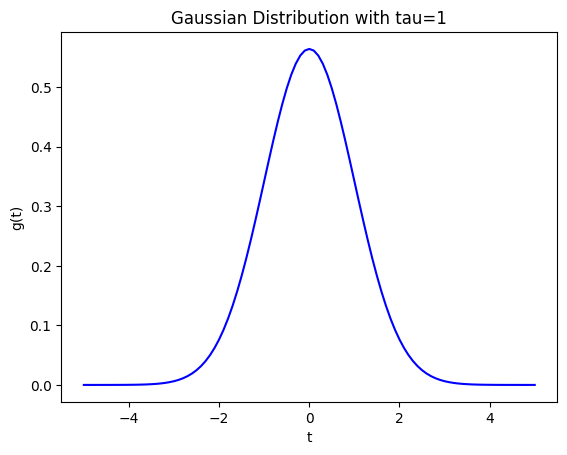

In [5]:
# array of times from -10 to 10 with an interval of 0.1
t = np.arange(-5, 5.1, 0.1)

# standard deviation tau
tau = 1
# gaussian distribution
gaussian = get_gaussian(t, tau)

plt.plot(t, gaussian, c='b');
plt.title(f"Gaussian Distribution with tau={tau}")
plt.xlabel("t")
plt.ylabel("g(t)");

In [6]:
# 1ii.

# approximates the value of tau given an array of times and a gaussian distribution
def tau_function(t : [int], gaussian : [int]):
    integral_1 = np.trapz(t**2 * gaussian)
    integral_2 = np.trapz(gaussian)
    return sqrt(integral_1 / integral_2)

tau_approximation = tau_function(t, gaussian)

The amplitude spectrum of a Gaussian distribution gets narrower as tau increases, i.e. as the distribution itself gets wider.
This agrees with what we learned about the uncertainty principle, as the functions that are more well localized in time are less localized in frequency and vice versa.


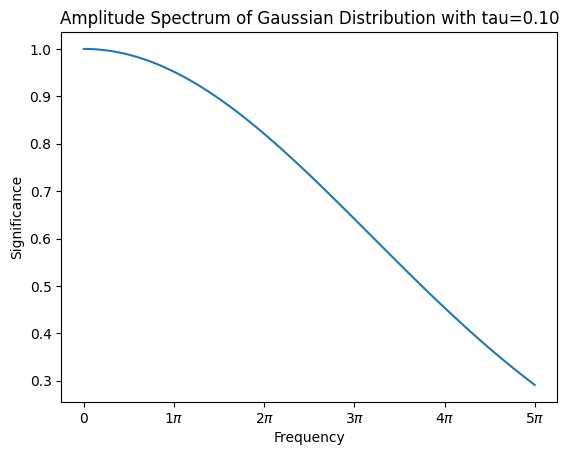

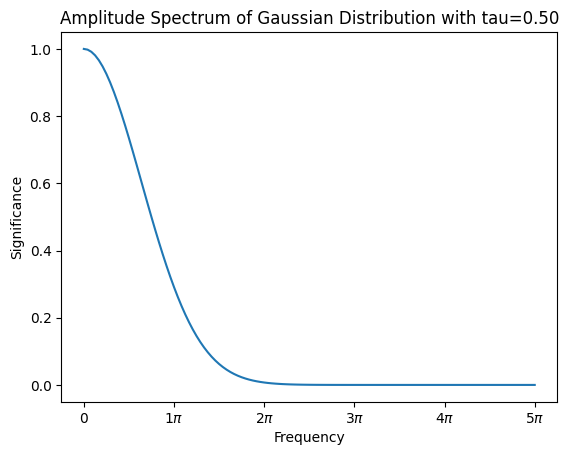

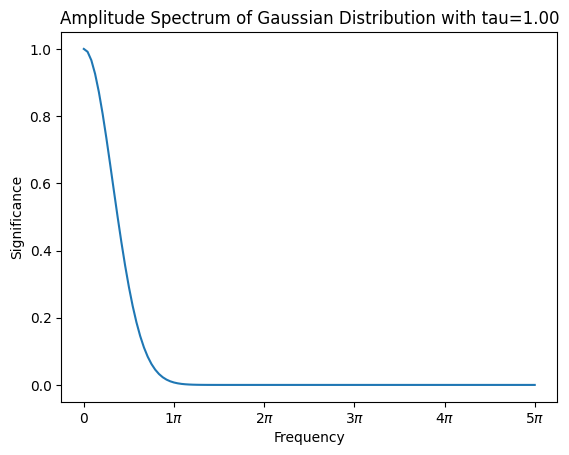

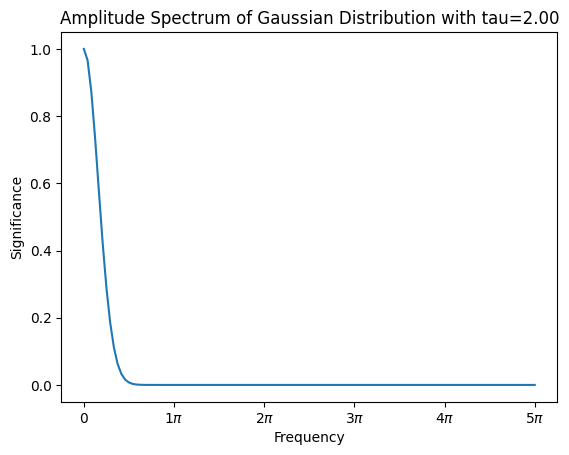

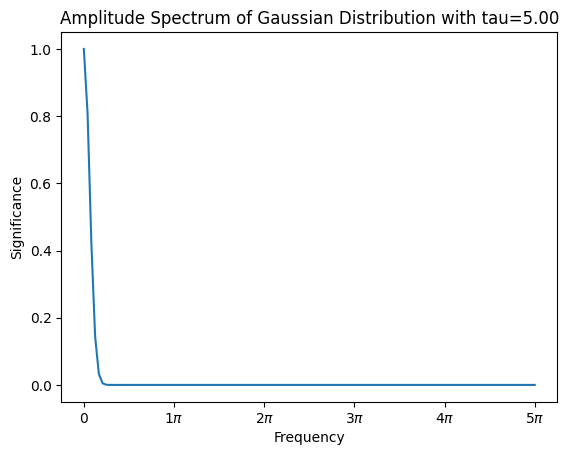

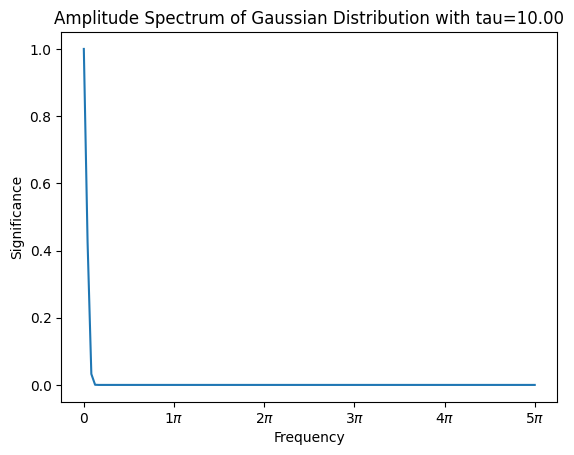

In [7]:
# 1iii.
# 1iv.

## calculates the amplitude spectrum of a gaussian distribution with a given value of tau over a range of frequencies, omega
def amplitude_spectrum_gaussian(omega : [int], tau : int):
    fig, ax = plt.subplots()
    
    fourier = exp(-(omega**2 * tau**2) / 2)
    amplitude = 2 * fourier
    
    ax.plot(omega, fourier)
    ax.xaxis.set_major_formatter(FuncFormatter(
            lambda val,pos: '{:.0f}$\pi$'.format(val/np.pi) if val !=0 else '0'
        ))
    ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
    ax.set_title(f"Amplitude Spectrum of Gaussian Distribution with tau={tau:.2f}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Significance")

omega = np.arange(0, 5*pi+.1, pi/24)

for tau in np.array([0.1, 0.5, 1, 2, 5, 10]):
    amplitude_spectrum_gaussian(omega, tau)

print("The amplitude spectrum of a Gaussian distribution gets narrower as tau increases, i.e. as the distribution itself gets wider.")
print("This agrees with what we learned about the uncertainty principle, as the functions that are more well localized in time are less localized in frequency and vice versa.")

In [8]:
# 2i.

df = pd.read_csv("data/maunaloa_weekly.csv")

df.Date = df.Date.apply(lambda x: datetime.date.fromisoformat(x))
df.Date = df.Date.apply(lambda x: ((x - df.Date[0]) / 7).days)
df = df.rename(columns={"Date": "Week"})

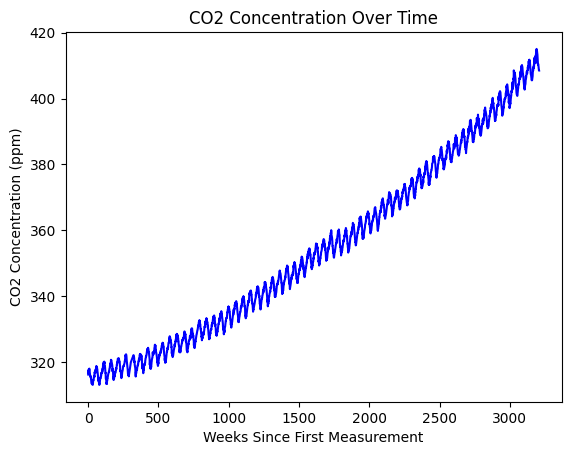

In [9]:
weeks = df.Week
concentrations = df["CO2 Concentration"]

plt.plot(weeks, concentrations, c='b')
plt.title("CO2 Concentration Over Time")
plt.xlabel("Weeks Since First Measurement")
plt.ylabel("CO2 Concentration (ppm)");

I created the following plot to zoom in on a small subset of the measurements. This let me get a better idea of the periodicity.
Looking at this plot, it seems that there is a consistent periodicity of about 52 weeks, or 1 year. This makes sense in the context of CO2 measurements.
I added lines at 52 week intervals to show that the peaks consistently occur on this interval.
A period of 52 weeks corresponds to a frequency of 1 cycle per year. I expect the amplitude spectrum would have a spike at this frequency, and be mostly flat and close to zero at all other frequencies.


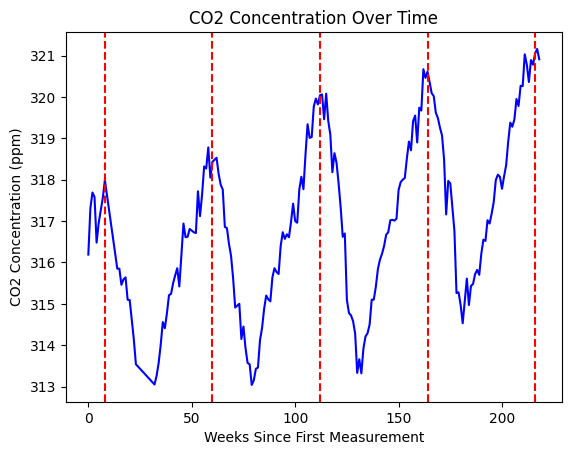

In [10]:
plt.plot(weeks[:200], concentrations[:200], c='b')
plt.title("CO2 Concentration Over Time")
plt.xlabel("Weeks Since First Measurement")
plt.ylabel("CO2 Concentration (ppm)");

for i in np.arange(8, 220, 52):
    plt.axvline(i, linestyle="dashed", c='r')

print("I created the following plot to zoom in on a small subset of the measurements. This let me get a better idea of the periodicity.")
print("Looking at this plot, it seems that there is a consistent periodicity of about 52 weeks, or 1 year. This makes sense in the context of CO2 measurements.")
print("I added lines at 52 week intervals to show that the peaks consistently occur on this interval.")
print("A period of 52 weeks corresponds to a frequency of 1 cycle per year. I expect the amplitude spectrum would have a spike at this frequency, and be mostly flat and close to zero at all other frequencies.")

The yearly fluctuations become smooth at about N=51, and further increasing N has little visual benefit. This is the best value because it essentially takes the running average of each year. At the ends of the time series there is a sharp drop on the graph.


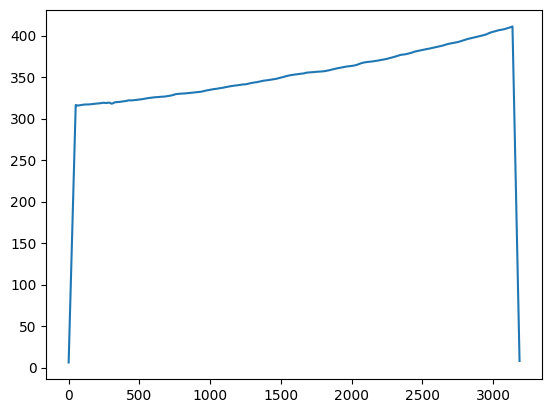

In [146]:
# 2iii.

fig, ax = plt.subplots()

N = 51
smoothing_arr = np.ones(int(N)) / N
ax.plot(np.convolve(concentrations, smoothing_arr))


print("The yearly fluctuations become smooth at about N=51, and further increasing N has little visual benefit. This is the best value because it essentially takes the running average of each year. At the ends of the time series there is a sharp drop on the graph.")

Convolving the data with a gaussian produces a very similar graph to the last convolution. The data is clearly less smooth than in the previous convolution.


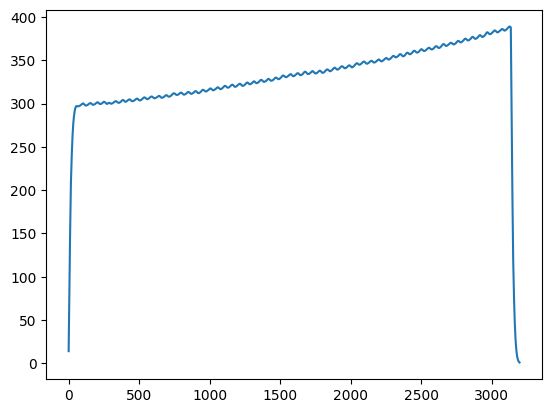

In [202]:
# 2iv.

fig, ax = plt.subplots()

gaussian_smoothing_arr = 2 * get_gaussian(weeks, 51/2)
ax.plot(np.convolve(concentrations, gaussian_smoothing_arr)[:3200]);

print("Convolving the data with a gaussian produces a very similar graph to the last convolution. The data is clearly less smooth than in the previous convolution.")